In [ ]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#ระบุที่อยู่ folder ของตัวเอง
%cd "/content/drive/MyDrive/Machine_Learning/New_York_City_Taxi_Trip_Duration_Regression"

/content/drive/MyDrive/Machine_Learning/New_York_City_Taxi_Trip_Duration_Regression


# **Data Science Life Cycle**

## **Data Understanding & Data Collection**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =pd.read_csv('train.csv')

In [ ]:
df.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
df.shape

(1458644, 11)

In [ ]:
df.isnull().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


## **Data Wrangling (Data Preparation/Cleaning)**

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [ ]:
df.drop(columns=['id','vendor_id','store_and_fwd_flag'],axis =1, inplace=True)

## **Feature Engineering & Scaling**

In [ ]:
# ฟังก์ชันสำหรับคำนวณระยะทางด้วย Haversine Formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # รัศมีโลกในหน่วยกิโลเมตร
    # แปลงพิกัดจากองศาเป็นเรเดียน
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # ใช้สูตร Haversine
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

# สร้างคอลัมน์ใหม่ 'distance_km'
df['distance_km'] = haversine(
    df['pickup_latitude'],
    df['pickup_longitude'],
    df['dropoff_latitude'],
    df['dropoff_longitude']
)

# แสดงข้อมูลตัวอย่างพร้อมคอลัมน์ใหม่
print(df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'distance_km']].head())

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

   distance_km  
0     1.498521  
1     1.805507  
2     6.385098  
3     1.485498  
4     1.188588  


In [ ]:
df.head(10)

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance_km
0,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,1.498521
1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,1.805507
2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,6.385098
3,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,1.485498
4,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,1.188588
5,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,443,1.098942
6,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,341,1.326279
7,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,1551,5.714981
8,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,255,1.310353
9,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,1225,5.121162


In [ ]:
df.drop(columns=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis =1, inplace=True)

In [ ]:
df.tail(5)

,pickup_datetime,dropoff_datetime,passenger_count,trip_duration,distance_km
1458639,2016-04-08 13:31:04,2016-04-08 13:44:02,4,778,1.225080
1458640,2016-01-10 07:35:15,2016-01-10 07:46:10,1,655,6.049836
1458641,2016-04-22 06:57:41,2016-04-22 07:10:25,1,764,7.824606
1458642,2016-01-05 15:56:26,2016-01-05 16:02:39,1,373,1.092564
1458643,2016-04-05 14:44:25,2016-04-05 14:47:43,1,198,1.134042


In [ ]:
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour_of_day'] = df['pickup_datetime'].dt.hour

In [ ]:
df.drop(columns=['pickup_datetime','dropoff_datetime'],axis =1, inplace=True)

In [ ]:
df.head(5)

,passenger_count,trip_duration,distance_km,month,day,day_of_week,hour_of_day
0,1,455,1.498521,3,14,0,17
1,1,663,1.805507,6,12,6,0
2,1,2124,6.385098,1,19,1,11
3,1,429,1.485498,4,6,2,19
4,1,435,1.188588,3,26,5,13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   passenger_count  1458644 non-null  int64  
 1   trip_duration    1458644 non-null  int64  
 2   distance_km      1458644 non-null  float64
 3   month            1458644 non-null  int32  
 4   day              1458644 non-null  int32  
 5   day_of_week      1458644 non-null  int32  
 6   hour_of_day      1458644 non-null  int32  
dtypes: float64(1), int32(4), int64(2)
memory usage: 55.6 MB


In [ ]:
df = pd.get_dummies(df, columns=['month', 'day_of_week', 'hour_of_day'])

In [ ]:
df.head(5)

,passenger_count,trip_duration,distance_km,day,month_1,month_2,month_3,month_4,month_5,month_6,...,hour_of_day_14,hour_of_day_15,hour_of_day_16,hour_of_day_17,hour_of_day_18,hour_of_day_19,hour_of_day_20,hour_of_day_21,hour_of_day_22,hour_of_day_23
0,1,455,1.498521,14,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,1,663,1.805507,12,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,1,2124,6.385098,19,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,429,1.485498,6,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1,435,1.188588,26,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.describe()

,passenger_count,trip_duration,distance_km,day
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.664530e+00,9.594923e+02,3.440864e+00,1.550402e+01
std,1.314242e+00,5.237432e+03,4.296538e+00,8.703135e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,3.970000e+02,1.231837e+00,8.000000e+00
50%,1.000000e+00,6.620000e+02,2.093717e+00,1.500000e+01
75%,2.000000e+00,1.075000e+03,3.875337e+00,2.300000e+01
max,9.000000e+00,3.526282e+06,1.240909e+03,3.100000e+01


In [ ]:
# กรองข้อมูลตามค่าที่สมเหตุสมผล
df = df[(df['trip_duration'] > 60) & (df['trip_duration'] < 10000)]
df = df[(df['distance_km'] > 0) & (df['distance_km'] < 100)]

In [ ]:
# กรองข้อมูลที่มีจำนวนผู้โดยสารเป็น 0 และมากกว่า 6 คนออก
df = df[df['passenger_count'] > 0]
df = df[df['passenger_count'] <= 6]

In [ ]:
df.shape

(1443503, 41)

In [ ]:
df.describe()

,passenger_count,trip_duration,distance_km,day
count,1.443503e+06,1.443503e+06,1.443503e+06,1.443503e+06
mean,1.664835e+00,8.420694e+02,3.464889e+00,1.550391e+01
std,1.314005e+00,6.570295e+02,3.946846e+00,8.703182e+00
min,1.000000e+00,6.100000e+01,4.241750e-04,1.000000e+00
25%,1.000000e+00,4.010000e+02,1.251041e+00,8.000000e+00
50%,1.000000e+00,6.660000e+02,2.112990e+00,1.500000e+01
75%,2.000000e+00,1.077000e+03,3.902086e+00,2.300000e+01
max,6.000000e+00,9.984000e+03,9.758621e+01,3.100000e+01


## **Exploratory Data Analysis (EDA) & Data Visualization**

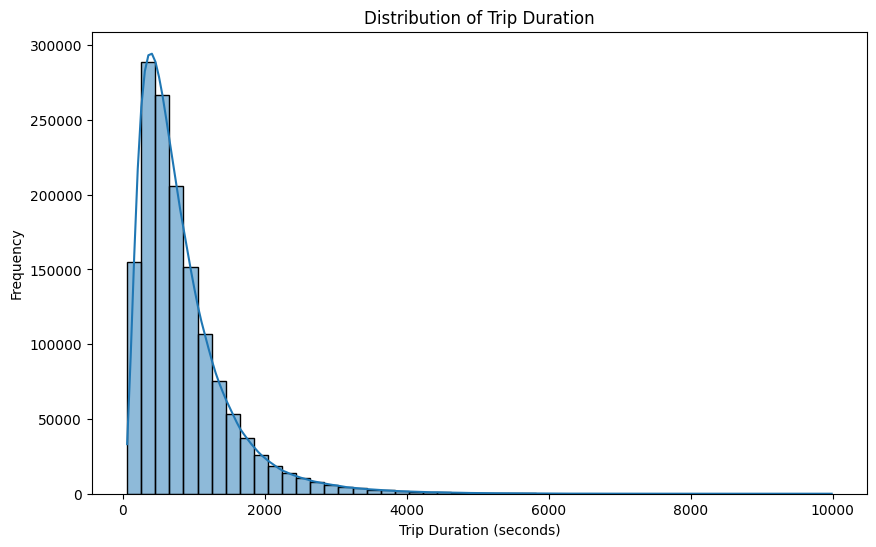

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_duration'], bins=50, kde=True)
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
skewness =df['trip_duration'].skew()
print(f"Skewness: {skewness}")

Skewness: 2.2966520246801116


In [ ]:
df['trip_duration'] = np.log(df['trip_duration'])

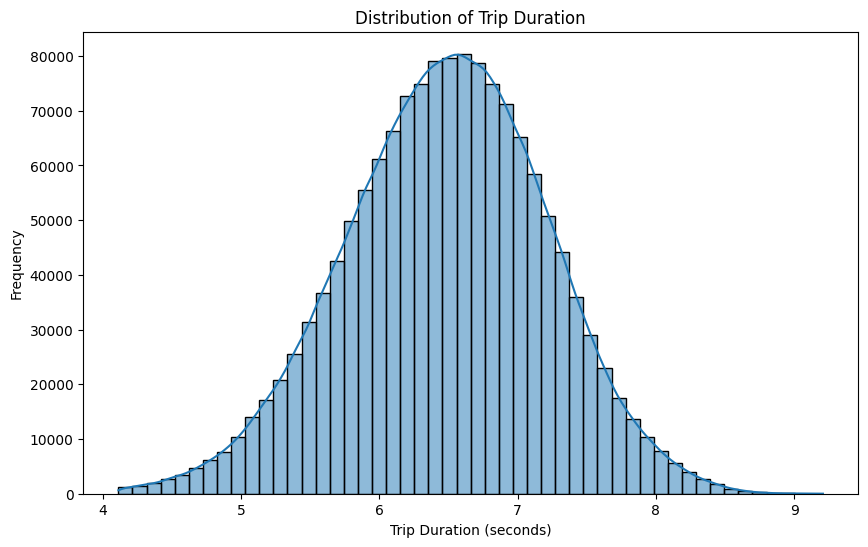

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_duration'], bins=50, kde=True)
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
skewness =df['trip_duration'].skew()
print(f"Skewness: {skewness}")

Skewness: -0.13317501398791753


In [ ]:
corr_matrix = df.corr()
trip_duration_correlations =corr_matrix['trip_duration']

print(trip_duration_correlations.sort_values(ascending=False))

trip_duration      1.000000
distance_km        0.661876
day_of_week_3      0.036558
hour_of_day_15     0.032436
hour_of_day_14     0.032407
month_6            0.030527
day_of_week_2      0.025897
month_5            0.025593
hour_of_day_16     0.024055
hour_of_day_17     0.023335
hour_of_day_13     0.021196
day_of_week_4      0.018966
hour_of_day_12     0.017734
hour_of_day_11     0.016511
passenger_count    0.014543
day_of_week_1      0.013324
day                0.011720
hour_of_day_18     0.011716
month_4            0.009627
hour_of_day_10     0.005470
hour_of_day_9      0.004448
hour_of_day_23    -0.000481
hour_of_day_8     -0.001245
hour_of_day_22    -0.001712
hour_of_day_19    -0.010336
month_3           -0.010678
hour_of_day_0     -0.010714
hour_of_day_21    -0.012357
hour_of_day_4     -0.016464
hour_of_day_20    -0.017582
day_of_week_0     -0.020380
hour_of_day_1     -0.021169
hour_of_day_3     -0.023218
hour_of_day_2     -0.026576
month_2           -0.027150
hour_of_day_5     -0

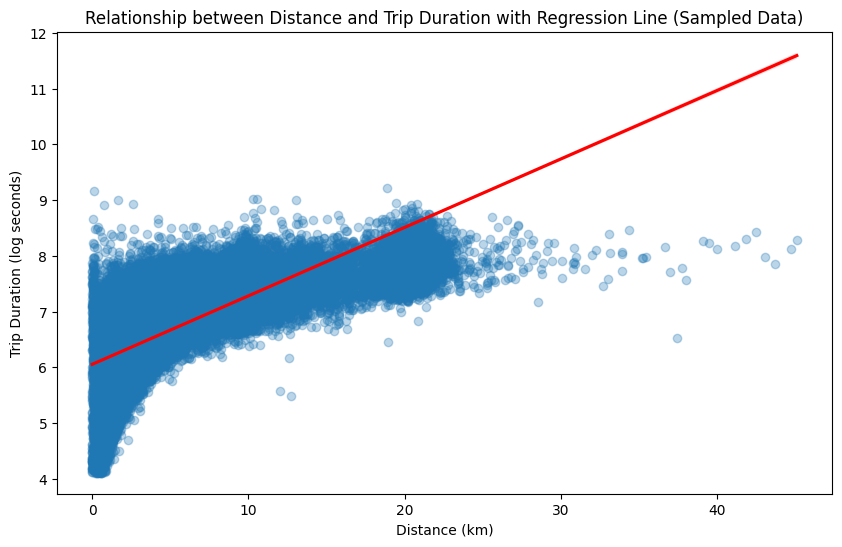

In [ ]:
df_sample = df.sample(n=100000)

plt.figure(figsize=(10, 6))
# ใช้ DataFrame ที่สุ่มตัวอย่างแล้ว (df_sample) ในการสร้างกราฟ
sns.regplot(x='distance_km', y='trip_duration', data=df_sample, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Relationship between Distance and Trip Duration with Regression Line (Sampled Data)')
plt.xlabel('Distance (km)')
plt.ylabel('Trip Duration (log seconds)')
plt.show()

## **Model Building & Evaluation**

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor
import time

In [ ]:
X = df.drop('trip_duration', axis=1)
y = df['trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_sample = X_train.sample(n=20000, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

In [ ]:
X_train_sample.shape

(20000, 40)

In [ ]:
y_train_sample.shape

(20000,)

In [2]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor())
])

NameError: name 'Pipeline' is not defined

In [ ]:
param_grid = {
    'model__n_estimators': [200, 300],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5]
}

print("เริ่มทำ Grid Search...")
start_time = time.time()
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train_sample, y_train_sample)
end_time = time.time()
grid_search_time = end_time - start_time
print(f"ใช้เวลาในการทำ Grid Search ทั้งหมด: {grid_search_time:.2f} วินาที")

print(f"Best parameters from Grid Search: {grid_search.best_params_}")
print(f"Best R^2 score on sampled data: {grid_search.best_score_:.4f}")

print("\nเริ่มฝึกโมเดลสุดท้ายบนข้อมูลชุดฝึกทั้งหมด...")
final_model = grid_search.best_estimator_
start_time_final_fit = time.time()
final_model.fit(X_train, y_train)
end_time_final_fit = time.time()
final_fit_time = end_time_final_fit - start_time_final_fit
print(f"ใช้เวลาในการฝึกโมเดลสุดท้าย: {final_fit_time:.2f} วินาที")

y_pred = final_model.predict(X_test)
final_r2_score = r2_score(y_test, y_pred)
print(f"Final R^2 score on full test set: {final_r2_score:.4f}")

เริ่มทำ Grid Search...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
ใช้เวลาในการทำ Grid Search ทั้งหมด: 289.64 วินาที
Best parameters from Grid Search: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 300}
Best R^2 score on sampled data: 0.6951

เริ่มฝึกโมเดลสุดท้ายบนข้อมูลชุดฝึกทั้งหมด...
ใช้เวลาในการฝึกโมเดลสุดท้าย: 946.38 วินาที
Final R^2 score on full test set: 0.7051


In [ ]:
import joblib

# กำหนดชื่อไฟล์สำหรับบันทึกโมเดล
filename = 'final_taxi_trip_duration_model.joblib'

# บันทึกโมเดลสุดท้ายลงในไฟล์
joblib.dump(final_model, filename)

print(f"\nโมเดลถูกบันทึกในชื่อไฟล์: {filename}")


โมเดลถูกบันทึกในชื่อไฟล์: final_taxi_trip_duration_model.joblib


## **Test Model**

In [ ]:
df_test =pd.read_csv('test.csv')

In [ ]:
df_test.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [ ]:
df_test.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [ ]:
def preprocess_for_prediction(df):

    # 1. Feature Engineering:
    def haversine(lat1, lon1, lat2, lon2):
        R = 6371
        lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
        c = 2 * np.arcsin(np.sqrt(a))
        return R * c

    # แปลงคอลัมน์ datetime และสร้าง features ใหม่
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['distance_km'] = haversine(
        df['pickup_latitude'], df['pickup_longitude'],
        df['dropoff_latitude'], df['dropoff_latitude']
    )
    df['month'] = df['pickup_datetime'].dt.month
    df['day'] = df['pickup_datetime'].dt.day
    df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
    df['hour_of_day'] = df['pickup_datetime'].dt.hour

    # 2. One-Hot Encoding:
    categorical_cols = ['month', 'day_of_week', 'hour_of_day']
    df = pd.get_dummies(df, columns=categorical_cols)

    return df

In [ ]:
final_model = joblib.load('final_taxi_trip_duration_model.joblib')
test_ids = df_test['id']

In [ ]:
df_test_processed = preprocess_for_prediction(df_test.copy())

In [ ]:
df_test_processed.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance_km,...,hour_of_day_14,hour_of_day_15,hour_of_day_16,hour_of_day_17,hour_of_day_18,hour_of_day_19,hour_of_day_20,hour_of_day_21,hour_of_day_22,hour_of_day_23
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,8817.324296,...,False,False,False,False,False,False,False,False,False,True
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,8822.085077,...,False,False,False,False,False,False,False,False,False,True
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,8817.985577,...,False,False,False,False,False,False,False,False,False,True
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,8812.802359,...,False,False,False,False,False,False,False,False,False,True
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,8813.946142,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df_test_processed.drop(columns =['id','vendor_id', 'store_and_fwd_flag', 'pickup_datetime',
        'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude'], axis =1, inplace =True)

In [ ]:
df_test_processed.tail(10)

,passenger_count,distance_km,day,month_1,month_2,month_3,month_4,month_5,month_6,day_of_week_0,...,hour_of_day_14,hour_of_day_15,hour_of_day_16,hour_of_day_17,hour_of_day_18,hour_of_day_19,hour_of_day_20,hour_of_day_21,hour_of_day_22,hour_of_day_23
625124,1,8818.691058,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
625125,1,8811.439234,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
625126,1,8818.298126,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
625127,2,8811.440985,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
625128,1,8813.890028,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
625129,1,8819.247758,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
625130,1,8816.939373,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
625131,2,8814.342319,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
625132,1,8813.748095,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
625133,2,8817.898058,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
predictions = final_model.predict(df_test_processed)

predicted_duration = np.exp(predictions)

submission = pd.DataFrame({
    'id': test_ids,
    'predicted_duration': predicted_duration
})

print("แสดงผลการทำนาย 5 แถวแรก:")
print(submission.tail())

แสดงผลการทำนาย 5 แถวแรก:
               id  predicted_duration
625129  id3008929         2277.794454
625130  id3700764         2277.794454
625131  id2568735         2324.854434
625132  id1384355         2277.794454
625133  id0621643         2324.854434
